# Datenanlyse zur Umfrage Persönliche Expertise

---

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Import data from csv

In [3]:
filename = 'data/export_0907.csv'
df = pd.read_csv(filename, sep=';')

In [4]:
df.head()

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,c_0001,c_0002,c_0003,...,rnd_pg_7356560_3,rnd_pg_7356560_4,rnd_pg_7356560_5,rnd_pg_7356560_6,rnd_pg_7356570_1,rnd_pg_7356570_2,rnd_pg_7356570_3,rnd_pg_7356570_4,rnd_pg_7356570_5,rnd_pg_7356570_6
0,176,0,0,31,7356546,-77,783,3,-66,-66,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
1,178,0,0,31,7356546,-77,1691,2,-66,-66,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
2,181,0,0,31,7356546,-77,865,-66,1,-66,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77
3,182,0,0,31,7356546,-77,536,-66,2,-66,...,7356565,7356566,7356563,7356561,-77,-77,-77,-77,-77,-77
4,184,0,0,31,7356546,-77,680,1,-66,970,...,-77,-77,-77,-77,-77,-77,-77,-77,-77,-77


In [5]:
import numpy as np
# Combine priming columns c_0001 and c_0002 into a single 'priming' column
df['priming'] = df['c_0001'].replace(-66, np.nan).fillna(df['c_0002']).astype(int)


In [6]:
# Create a mapping dictionary for variable names to keywords/questions
variable_mapping = {
    'v_216': 'Berufserfahrung Ja/Nein',
    'v_218': 'Berufserfahrung Bereich',
    'v_228': 'Berufserfahrung Dauer',
    'v_206': 'Faktentwissen Phase Designprozess',
    'v_207': 'Faktentwissen Laufweite',
    'v_208': 'Faktentwissen RGB',
    'v_209': 'Faktentwissen Gestaltpsychologie',
    'v_210': 'Faktentwissen Form folgt Funktion',
    'v_211': 'Faktentwissen Kerning',
    'v_212': 'Faktentwissen CMYK',
    'v_213': 'Faktentwissen Weniger ist mehr',
    'v_214': 'Faktentwissen Signifier',
    'v_215': 'Faktentwissen Goldener Schnitt',
    
    'v_8978': 'CVPA 1',
    'v_9154': 'CVPA 2',
    'v_9155': 'CVPA 3',
    'v_9156': 'CVPA 4',
    'v_9157': 'CVPA 5',
    'v_9158': 'CVPA 6',
    'v_9159': 'CVPA 7',
    'v_9160': 'CVPA 8',
    'v_9308': 'CVPA 9',
}

# Function to get readable column name
def get_readable_name(column_name):
    return variable_mapping.get(column_name, column_name)


In [7]:
def classify_professional(row):
    # Check if any CVPA score is less than 2
    cvpa_columns = ['v_8978', 'v_9154', 'v_9155', 'v_9156', 'v_9157', 'v_9158', 'v_9159', 'v_9160', 'v_9308']
    for col in cvpa_columns:
        if row[col] < 2:
            return False
    
    # Check if sum of CVPA scores is less than 34
    cvpa_sum = sum(row[col] for col in cvpa_columns)
    if cvpa_sum < 34:
        return False
    
    # Count correct answers for knowledge questions
    correct_answers = 0
    knowledge_answers = {
        'v_206': 3,
        'v_207': 3,
        'v_208': 2,
        'v_209': 2,
        'v_210': 3,
        'v_211': 3,
        'v_212': 2,
        'v_213': 4,
        'v_214': 1,
        'v_215': 3
    }
    
    for col, correct_value in knowledge_answers.items():
        if col in row and row[col] == correct_value:
            correct_answers += 1
    
    # Check if correct answers is less than 6
    if correct_answers < 6:
        return False
    
    return True

# Apply the classification function to create a new column
df['is_professional'] = df.apply(classify_professional, axis=1)

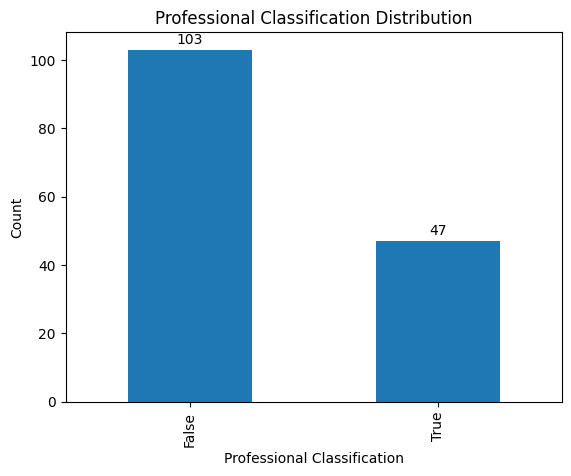

In [8]:
counts = df['is_professional'].value_counts()
ax = counts.plot(kind='bar', title='Professional Classification Distribution')
ax.set_xlabel('Professional Classification')
ax.set_ylabel('Count')

# Add value labels on top of bars
for i, v in enumerate(counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

## Forschungsfrage
- Hat die persönliche Expertise von
Konsument:innen einen Einfluss auf
Präferenzen und Preiserwartungen von
stilistisch konsistenten und
inkonsistenten Produktensembles.

## Hypothesen

### Hypothesen zu Präferenzen:
**H0₁:** Persönliche Expertise hat **keinen** Einfluss auf die Präferenzen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten = μ_Nicht-Experten (bezüglich Präferenzwerten)

**H1₁:** Persönliche Expertise hat einen **signifikanten** Einfluss auf die Präferenzen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten ≠ μ_Nicht-Experten (bezüglich Präferenzwerten)

### Hypothesen zu Preiserwartungen:
**H0₂:** Persönliche Expertise hat **keinen** Einfluss auf die Preiserwartungen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten = μ_Nicht-Experten (bezüglich Preiserwartungen)

**H1₂:** Persönliche Expertise hat einen **signifikanten** Einfluss auf die Preiserwartungen für stilistisch konsistente vs. inkonsistente Produktensembles.
- μ_Experten ≠ μ_Nicht-Experten (bezüglich Preiserwartungen)

### Statistische Tests:
- **Unabhängige t-Tests** für Mittelwertvergleiche zwischen Experten (`is_professional = True`) und Nicht-Experten (`is_professional = False`)
- **Signifikanzniveau:** α = 0.05
- **Zweiseitige Tests** (da keine gerichtete Hypothese vorliegt)

## Variablen
### Abhängige Variablen (AV)

- **Preiserwartung**  
  Für welchen Preis würden Sie erwarten, dass das Produkt/Ensemble angeboten wird? (metrisch)  
  - einzeln  
  - ensemble  
  - korrektur ensemble

- **Objektive Einzelbewertung (Liking)**  
  - minderwertig ↔ hochwertig (Likert-Skala)  
  - einfach ↔ luxuriös (Likert-Skala)  
  - billig ↔ teuer (Likert-Skala)

- **Subjektive Einzelbewertung (Liking)**  
  - Das Produkt gefällt mir gut. (Likert-Skala)  
  - Ich mag das Produkt. (Likert-Skala)  
  - Ich finde das Produkt ansprechend. (Likert-Skala)

- **Objektive Ensemble-Bewertung**  
  - minderwertig ↔ hochwertig (Likert-Skala)  
  - einfach ↔ luxuriös (Likert-Skala)  
  - billig ↔ teuer (Likert-Skala)

- **Subjektive Ensemble-Bewertung**  
  - Das Ensemble gefällt mir gut. (Likert-Skala)  
  - Ich mag das Ensemble. (Likert-Skala)  
  - Ich finde das Ensemble ansprechend. (Likert-Skala)

- **Produktdarstellung**  
  - Die Kombination vermittelt mir relevante Informationen über die Produkte. (Likert-Skala)  
  - Die gezeigte Zusammenstellung hilft mir, die Produkte besser zu verstehen. (Likert-Skala)  
  - Die Präsentation erleichtert es mir, die Produkte zu beurteilen. (Likert-Skala)  
  - Durch die Präsentation kann ich mir vorstellen, welche Personen dieses Outfit tragen würden. (Likert-Skala)  
  - Durch die Präsentation kann ich mir vorstellen, in welchen beruflichen Situationen das Outfit getragen wird. (Likert-Skala)  
  - Ich verstehe, wie man die Teile elegant, seriös und professionell kombiniert. (Likert-Skala)

- **Bewertungsleichtigkeit**  
  - Es fällt mir leicht, das Outfit zu bewerten. (Likert-Skala)  
  - Ich erfasse das Outfit visuell schnell. (Likert-Skala)  
  - Ich kann mir das Outfit mit geschlossenen Augen in Erinnerung rufen. (Likert-Skala)  
  - Ich kann das Outfit später einer anderen Person beschreiben. (Likert-Skala)

- **Gesamtwirkung**  
  - uneinheitlich ↔ einheitlich (Likert-Skala)  
  - unstimmig ↔ stimmig (Likert-Skala)  
  - unharmonisch ↔ harmonisch (Likert-Skala)

- **Stileinordnung**  
  - Hippie (Likert-Skala)  
  - Hip Hop / Active Wear (Likert-Skala)  
  - Boho (Likert-Skala)

---

### Unabhängige Variablen (UV)


- **Priming-Konsistenz**  
  - konsistentes Ensemble  
  - inkonsistentes Ensemble  
  - inkonsistentes Ensemble mit nichtansprechendem Oberteil

- **Stilrichtung**  
  - Hippie × Minimalistisch

- **Produktkategorie**  
  - Oberteil

- **Expertenstatus**  
  - Experte vs. Nicht-Experte (gemäß Faktenwissen & CVPA)

> **Design:** 3 × 2-Faktor (Priming-Konsistenz × Expertenstatus), between-subjects

---

### Kontroll- und Störvariablen

- **Demografische Variablen**  
  - Alter (metrisch, Jahre)  
  - Geschlecht (nominal, z. B. m/w/d)  
  - Einkommen (metrisch oder ordinal gruppiert)  
  - Bildungsgrad (ordinal)  
  - Beruf (nominal)

- **Berufserfahrung**  
  - (metrisch, Jahre)

- **CVPA-Score**  
  - (metrisch)

- **Faktenwissen-Score**  
  - (metrisch)


## Überprüfung der Hypothesen

---

### Hypothese 1 (Präferenzwerte)
- **Hypothese:**  
  - H₀₁: μ$_{Experten}$ = μ$_{NOT-Experten}$
  - H₁₁: μ$_{Experten}$ ≠ μ$_{NOT-Experten}$
- **Variable:**  
  - ΔLiking = Liking $_{konsistent}$ – Liking $_{inkonsistent}$
- **Methode:**  
  - **Unabhängiger t-Test** (zweiseitig)  
    - *Warum:* Vergleich von Mittelwerten zweier unabhängiger Gruppen bei intervallskaliertem DV  
- **Voraussetzungen prüfen:**  
  - **Normalverteilung** der ΔLiking in beiden Gruppen (Shapiro-Wilk-Test)
  - **Varianzhomogenität** (Levene-Test)  
- **Alternative bei Verletzung:**  
  - **Mann-Whitney-U-Test** (zweiseitig)  
    - *Warum:* Kein parametrischer Test, robust gegen Normalitätsverletzung  
- **Effektstärke:**  
  - Cohen’s d (t-Test) oder Rang-Biseriale Korrelation (Mann-Whitney)

---

### Hypothese 2 (Preiserwartungen)
- **Hypothese:**  
  - H₀₂: μ$_{Experten}$ = μ$_{NOT-Experten}$
  - H₁₂: μ$_{Experten}$ ≠ μ$_{NOT-Experten}$
- **Variable:**  
  - ΔPreis = Preiserwartung $_{konsistent}$ – Preiserwartung $_{inkonsistent}$
- **Statistisches Mittel & Vorgehen:**  
  - Analog zu Hypothese 1 (t-Test, Voraussetzungen, Alternative, Effektstärke)

---

### Signifikanz & Bericht
- **α = 0,05** (zweiseitig)  
- **Bericht:**  
  - Teststatistik (t-Wert bzw. U-Wert), p-Wert, Effektstärke  
  - Überprüfung der Testvoraussetzungen dokumentieren  


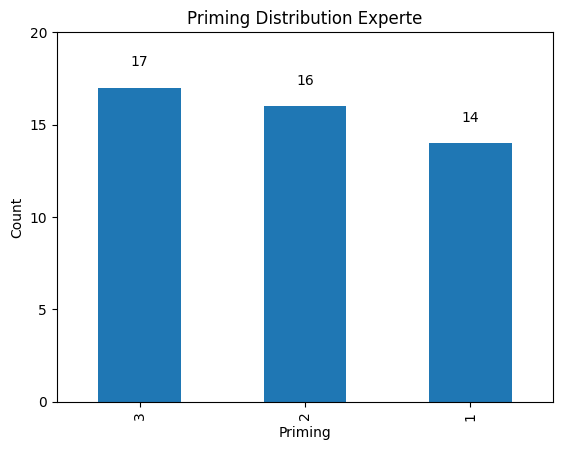

In [9]:
# Distribution of priming levels
filtered_rows = df[df['is_professional']].copy()
priming_counts = filtered_rows['priming'].value_counts()
ax = priming_counts.plot(kind='bar', title='Priming Distribution Experte')
ax.set_xlabel('Priming')
ax.set_ylabel('Count')
ax.set_yticks(range(0, priming_counts.max() + 5, 5))

# Add value labels on top of bars
for i, v in enumerate(priming_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

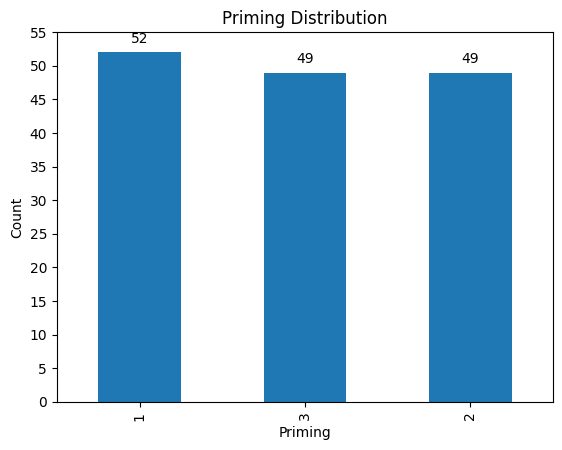

In [10]:
# Alternative priming distribution (column c_0002 replaced)
# Using combined 'priming' column instead
priming_counts = df['priming'].value_counts()
ax = priming_counts.plot(kind='bar', title='Priming Distribution')
ax.set_xlabel('Priming')
ax.set_ylabel('Count')
ax.set_yticks(range(0, priming_counts.max() + 5, 5))

# Add value labels on top of bars
for i, v in enumerate(priming_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
def reduce_columns(row):
    # Get all columns that start with 'v_'
    v_columns = [col for col in row.index if col.startswith('v_')]

    # Filter out columns that have negative values
    valid_columns = ['priming', 'is_professional']  # Always include these columns
    counter = 0
    rename_map = dict()
    inverse_map = dict()
    for col in v_columns:
        try:
            if int(row[col]) >= 0:
                valid_columns.append(col)
                counter += 1
                if f"Q{counter}" not in rename_map:
                    rename_map[f"Q{counter}"] = col
                else:
                    rename_map[f"Q{counter}"] += col
                
                if col not in inverse_map:
                    inverse_map[col] = f"Q{counter}"
                else:
                    inverse_map[col] = f"Q{counter}"
        except ValueError:
            # If conversion to int fails, skip this column
            continue
    
    # Create the result series with renamed columns
    result = {}
    for col in valid_columns:
        if col in inverse_map:
            # Use the Q-column name from inverse_map
            result[inverse_map[col]] = row[col]
        else:
            # Keep original column name for non-v columns
            result[col] = row[col]
    
    return pd.Series(result)
    


cleanded_df = df.apply(reduce_columns, axis=1)
cleanded_df.head()

,priming,is_professional,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99
0,3,True,2,0,0,0,0,0,0,0,...,5,4,3,4,3,2,51,1,2,4
1,2,True,1,1,1,0,1,0,0,0,...,5,5,4,5,1,1,47,1,2,4
2,1,False,2,0,0,0,0,0,0,0,...,5,5,4,4,2,2,60,2,2,5
3,2,False,2,0,0,0,0,0,0,0,...,5,5,5,4,1,1,22,1,1,1
4,1,True,2,0,0,0,1,0,0,0,...,4,5,4,4,1,3,19,1,1,3


In [11]:
def filter_valid_v_columns_by_priming(df, priming_column='priming', missing_codes=[-77, -66]):
    """
    Filter rows where priming_column is not NaN and return columns starting with 'v_' 
    that have valid data (excluding missing codes) for each priming group.
    Each priming group can have different valid columns.
    It also cleans the data by removing rows with missing values.
    """
    results = {}

    # Filter rows where priming column is not NaN
    valid_rows = df[df[priming_column].notna()].copy()
    
    # Get all columns starting with 'v_'
    v_columns = [col for col in df.columns if col.startswith('v_')]
    
    print(f"Total columns starting with 'v_': {len(v_columns)}")
    print(f"Treating {missing_codes} as missing data codes")
    
    for priming_value in valid_rows[priming_column].unique():
        priming_subset = valid_rows[valid_rows[priming_column] == priming_value].copy()
        print(f"Priming {priming_value}: processing {priming_subset.shape[0]} rows")
        
        if len(priming_subset) > 0:
            valid_v_cols = []
            for col in v_columns:
                # Convert to numeric, coercing errors
                numeric_col = pd.to_numeric(priming_subset[col], errors='coerce')
                
                # Replace missing codes with NaN
                cleaned_col = numeric_col.copy()
                for missing_code in missing_codes:
                    cleaned_col = cleaned_col.replace(missing_code, np.nan)
                
                # Check if column has any valid (non-NaN) data
                if cleaned_col.notna().any():
                    valid_v_cols.append(col)
            
            print(f"Priming {priming_value}: {len(valid_v_cols)} valid v-columns found")
            
            if valid_v_cols:
                # Create a new DataFrame with only the valid columns for this priming group
                final_columns = ['lfdn', priming_column] + valid_v_cols
                group_df = priming_subset[final_columns].copy()

                # Replace missing codes with NaN in the selected columns
                for col in valid_v_cols:
                    group_df[col] = pd.to_numeric(group_df[col], errors='coerce')
                    for missing_code in missing_codes:
                        group_df[col] = group_df[col].replace(missing_code, np.nan)
                
                # Drop rows with any NaN values in the v_columns
                original_rows = len(group_df)
                group_df.dropna(subset=valid_v_cols, inplace=True)
                print(f"Priming {priming_value}: Dropped {original_rows - len(group_df)} rows with missing values.")

                results[priming_value] = group_df
            else:
                results[priming_value] = pd.DataFrame()
        else:
            results[priming_value] = pd.DataFrame()
    
    return results

filtered_data = filter_valid_v_columns_by_priming(df)
# for priming_val, subset in filtered_data.items():
#     print(f"Priming {priming_val}: {subset.shape}")
    
# print(f"{filtered_data.get(2)}")

Total columns starting with 'v_': 427
Treating [-77, -66] as missing data codes
Priming 3: processing 49 rows
Priming 3: 164 valid v-columns found
Priming 2: processing 49 rows
Priming 2: 164 valid v-columns found
Priming 1: processing 52 rows
Priming 1: 164 valid v-columns found


In [24]:
# Stack filtered DataFrames with uniform Q-columns
dfs = []
rename_maps = []
common_cols = ['lfdn', 'priming']  # updated to use combined 'priming' column
for subset in filtered_data.values():
    # Skip empty DataFrames to avoid missing columns
    if subset.empty:
        continue
    # Identify subset-specific v-columns
    v_cols = [col for col in subset.columns if col not in common_cols]
    print(f"Processing subset with priming {subset['priming'].iloc[0]}: {v_cols} v-columns found")
    # Rename to Q1..Qn
    rename_map = {col: f"Q{idx+1}" for idx, col in enumerate(v_cols)}
    rename_maps.append(rename_map)
    df_renamed = subset.rename(columns=rename_map)
    # Reorder columns: common first, then Q-columns
    df_renamed = df_renamed[common_cols + list(rename_map.values())]
    dfs.append(df_renamed)
# Concatenate all rows
combined_df = pd.concat(dfs, ignore_index=True)
# rename_maps

Processing subset with priming 3: ['v_216', 'v_218', 'v_219', 'v_220', 'v_221', 'v_222', 'v_223', 'v_224', 'v_225', 'v_226', 'v_228', 'v_206', 'v_207', 'v_208', 'v_209', 'v_210', 'v_211', 'v_212', 'v_213', 'v_214', 'v_215', 'v_8978', 'v_9154', 'v_9155', 'v_9156', 'v_9157', 'v_9158', 'v_9159', 'v_9160', 'v_9308', 'v_11044', 'v_11045', 'v_11046', 'v_11047', 'v_11048', 'v_11049', 'v_11050', 'v_11053', 'v_11054', 'v_11055', 'v_11056', 'v_11057', 'v_11058', 'v_11059', 'v_11062', 'v_11063', 'v_11064', 'v_11065', 'v_11066', 'v_11067', 'v_11068', 'v_11071', 'v_11072', 'v_11073', 'v_11074', 'v_11075', 'v_11076', 'v_11077', 'v_11080', 'v_11081', 'v_11082', 'v_11083', 'v_11084', 'v_11085', 'v_11086', 'v_11089', 'v_11090', 'v_11091', 'v_11092', 'v_11093', 'v_11094', 'v_11095', 'v_11408', 'v_11098', 'v_11099', 'v_11100', 'v_11101', 'v_11102', 'v_11103', 'v_11384', 'v_11385', 'v_11386', 'v_11387', 'v_11388', 'v_11389', 'v_11104', 'v_11105', 'v_11106', 'v_11107', 'v_11108', 'v_11109', 'v_11110', 'v_1

In [13]:
print(f"Combined DataFrame shape: {combined_df.shape}")
combined_df.head()

Combined DataFrame shape: (150, 166)


,lfdn,priming,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164
0,176,3,2,0,0,0,0,0,0,0,...,-77,-77,-77,-77,-77,-77,51,1,2,4
1,191,3,1,1,0,0,1,0,0,0,...,5,5,5,5,1,2,26,2,2,4
2,199,3,2,0,0,0,0,0,0,0,...,-77,-77,-77,-77,-77,-77,25,1,1,3
3,203,3,2,0,0,0,0,0,0,0,...,5,5,5,5,1,1,24,2,1,4
4,210,3,2,1,0,0,0,0,0,0,...,4,2,3,4,2,2,37,1,2,1


In [23]:
# Find all columns that contain -77 as a value
columns_with_minus77 = []

for col in combined_df.columns:
    if combined_df[col].eq(-77).any():
        columns_with_minus77.append(col)

print(f"Columns containing -77: {len(columns_with_minus77)} columns found")
print(columns_with_minus77)

# Optional: Show count of -77 values per column
print("\nCount of -77 values per column:")
for col in columns_with_minus77:
    count = combined_df[col].eq(-77).sum()
    readable_name = get_readable_name(col)
    print(f"{col} ({readable_name}): {count}")

Columns containing -77: 117 columns found
['Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72', 'Q74', 'Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q82', 'Q83', 'Q84', 'Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q90', 'Q91', 'Q92', 'Q93', 'Q94', 'Q95', 'Q97', 'Q98', 'Q99', 'Q100', 'Q101', 'Q102', 'Q104', 'Q105', 'Q106', 'Q107', 'Q108', 'Q109', 'Q111', 'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q118', 'Q119', 'Q120', 'Q121', 'Q122', 'Q123', 'Q125', 'Q126', 'Q127', 'Q128', 'Q129', 'Q130', 'Q132', 'Q133', 'Q134', 'Q135', 'Q136', 'Q137', 'Q139', 'Q140', 'Q141', 'Q142', 'Q143', 'Q144', 'Q145', 'Q146', 'Q147', 'Q148', 'Q149', 'Q150', 'Q151', 'Q152', 'Q153', 'Q154', 'Q155', 'Q156', 'Q157', 'Q158', 'Q159', 'Q160', 'mean_columns']

Count of -77 values per column:
Q32 (Q32): 112
Q33 (Q33): 112
Q34 (Q34): 

In [25]:
# Count rows that contain -77 in any column
rows_with_minus77 = (combined_df == -77).any(axis=1).sum()
print(f"Number of rows containing -77: {rows_with_minus77}")

# Alternative: Show total count of -77 values across all cells
total_minus77_values = (combined_df == -77).sum().sum()
print(f"Total number of -77 values in the dataset: {total_minus77_values}")

Number of rows containing -77: 150
Total number of -77 values in the dataset: 8700


In [14]:
def get_original_columns(q_cols, rename_maps):
    """
    Given a list of new column names (e.g., ['Q1', 'Q2']),
    and the list of rename_maps used for each subset,
    return a list of lists where each inner list contains
    the corresponding original 'v_' column names.
    """
    original_cols_list = []
    for rename_map in rename_maps:
        inv_map = {new: old for old, new in rename_map.items()}
        originals = [inv_map.get(q, None) for q in q_cols]
        original_cols_list.append(originals)
    return original_cols_list

# Example usage:
# original_lists = get_original_columns(['Q33', 'Q34'], rename_maps)
# print(original_lists)

In [15]:
get_original_columns(['Q155', 'Q156', 'Q157'], rename_maps)

[['v_11358', 'v_11359', 'v_11360'],
 ['v_11300', 'v_11301', 'v_11302'],
 ['v_11373', 'v_11374', 'v_11375']]

In [16]:
def get_q_columns_from_v(v_cols, rename_maps):
    """
    Given a list of original 'v_' column names and the list of rename_maps,
    return a set of corresponding new 'Q' column names across all subsets.
    """
    q_cols_set = set()
    for rename_map in rename_maps:
        for v in v_cols:
            if v in rename_map:
                q_cols_set.add(rename_map[v])
    return q_cols_set

# Example usage:
q_set = get_q_columns_from_v(['v_10915'], rename_maps)
print(q_set)

{'Q42'}


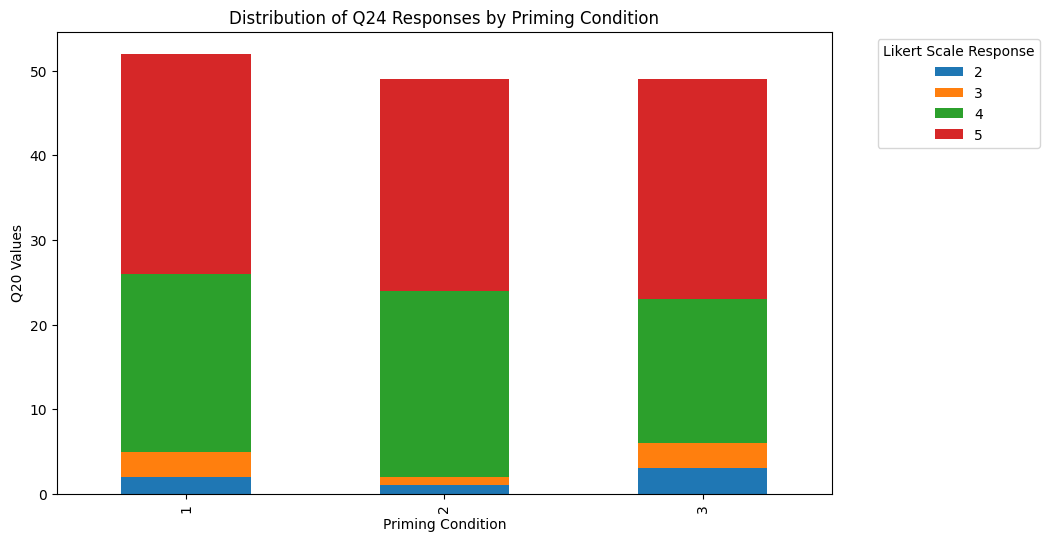

In [17]:
# Create a stacked bar chart showing distribution of responses
response_counts = combined_df.groupby(['priming', 'Q24']).size().unstack(fill_value=0)
ax = response_counts.plot(kind='bar', stacked=True, figsize=(10, 6), 
                         title='Distribution of Q24 Responses by Priming Condition')
ax.legend(title='Likert Scale Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('')  
plt.xlabel('Priming Condition')
plt.ylabel('Q20 Values')
plt.show()

Columns to analyze: ['Q33', 'Q34', 'Q32']
Available columns in combined_df: ['lfdn', 'priming', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72', 'Q73', 'Q74', 'Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q82', 'Q83', 'Q84', 'Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q90', 'Q91', 'Q92', 'Q93', 'Q94', 'Q95', 'Q96', 'Q97', 'Q98', 'Q99', 'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107', 'Q108', 'Q109', 'Q110', 'Q111', 'Q112', 'Q113', 'Q114', 'Q115', 'Q116', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'Q122', 'Q123', 'Q124', 'Q125', 'Q126', 'Q12

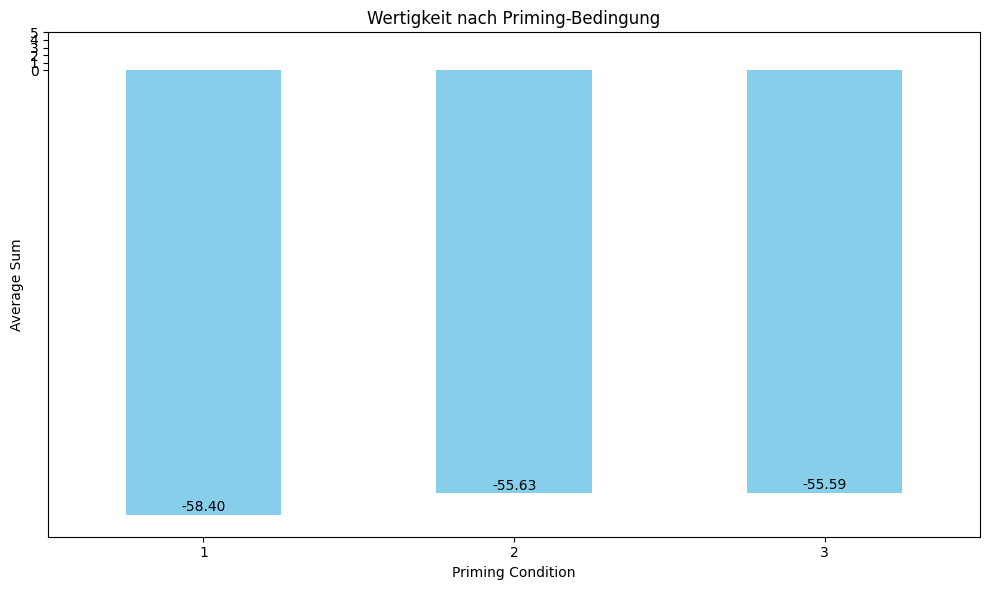

In [18]:
q_set = get_q_columns_from_v(['v_10903','v_10904','v_10905'], rename_maps)
# q_set = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']  # Example Q columns to analyze

columns_to_analyze = list(q_set)
print(f"Columns to analyze: {columns_to_analyze}")
print(f"Available columns in combined_df: {list(combined_df.columns)}")

# Check if we have any valid columns
if not columns_to_analyze:
    print("No matching columns found. Let's check what Q columns are available:")
    q_columns = [col for col in combined_df.columns if col.startswith('Q')]
    print(f"Available Q columns: {q_columns}")
    # Use the first few Q columns if available
    if q_columns:
        columns_to_analyze = q_columns[:3]  # Take first 3 Q columns
        print(f"Using columns: {columns_to_analyze}")

# Calculate mean of the columns for each row, then average by priming condition
if columns_to_analyze:
    combined_df['mean_columns'] = combined_df[columns_to_analyze].mean(axis=1)
    mean_by_priming = combined_df.groupby(['priming'])['mean_columns'].mean()
    
    print(f"Mean by priming: {mean_by_priming}")
    
    # Create bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))
    mean_by_priming.plot(kind='bar', ax=ax, title='Wertigkeit nach Priming-Bedingung', color='skyblue')
    ax.set_xlabel('Priming Condition')
    ax.set_ylabel('Average Sum')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(range(0, 6, 1))
    
    # Add value labels on top of bars
    for i, v in enumerate(mean_by_priming.values):
        ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("No columns available for analysis")

In [19]:
# Boxplot of mean_columns distribution by priming condition
plt.figure(figsize=(10, 6))
# Use pandas boxplot grouped by c_0001, whiskers to min/max to include all points
combined_df.boxplot(column='mean_columns', by='c_0001', grid=False, figsize=(10, 6), whis=[0,100])
plt.title('Wertigkeit des Outfits nach Priming-Bedingung (Experten)')
plt.xlabel('Priming Condition (c_0001)')
plt.ylabel('Mean Sum of Columns')
plt.suptitle('')  # clear the automatic suptitle
plt.show()

KeyError: 'c_0001'

<Figure size 1000x600 with 0 Axes>